<a href="https://colab.research.google.com/github/NguyenHan243/fuzzylogic/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.3 MB/s eta 0:00:00


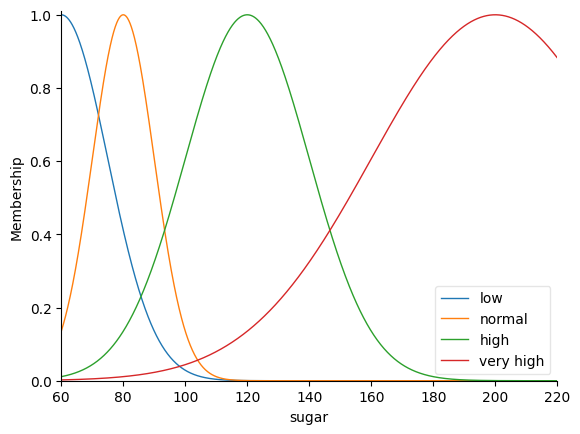

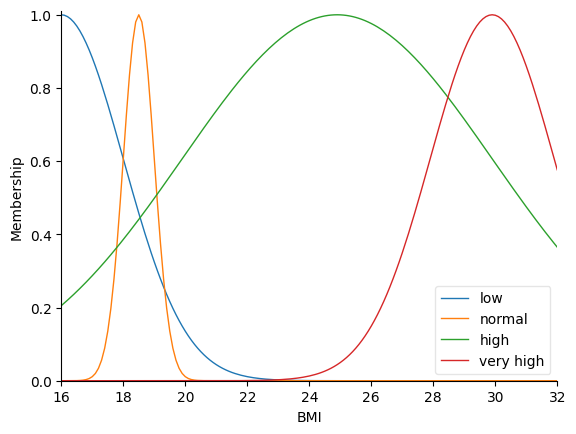

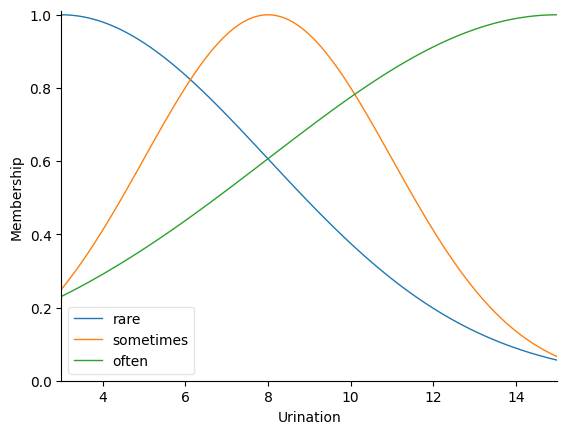

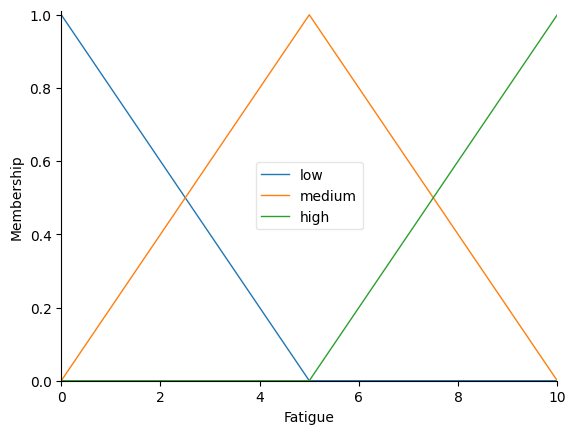

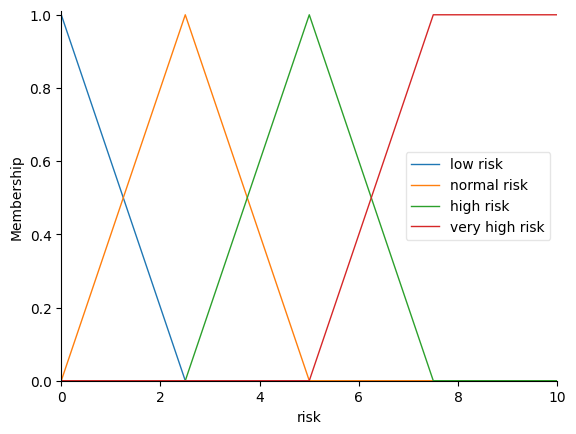

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sugar = ctrl.Antecedent(np.arange(60,220.1,0.1),'sugar')
BMI = ctrl.Antecedent(np.arange(16,32.1,0.1),'BMI')
Urination = ctrl.Antecedent(np.arange(3,15.1,0.1),'Urination')
Fatigue = ctrl.Antecedent(np.arange(0,10.1,0.1),'Fatigue')
risk= ctrl.Consequent(np.arange(0,10.1,0.1),'risk')

sugar['low']=fuzz.gaussmf(sugar.universe,60,15)
sugar['normal']=fuzz.gaussmf(sugar.universe,80,10)
sugar['high']=fuzz.gaussmf(sugar.universe,120,20)
sugar['very high']=fuzz.gaussmf(sugar.universe,200,40)

BMI['low']=fuzz.gaussmf(BMI.universe,16,2)
BMI['normal']=fuzz.gaussmf(BMI.universe,18.5,0.5)
BMI['high']=fuzz.gaussmf(BMI.universe,24.9,5)
BMI['very high']=fuzz.gaussmf(BMI.universe,29.9,2)

Urination['rare']=fuzz.gaussmf(Urination.universe,3,5)
Urination['sometimes']=fuzz.gaussmf(Urination.universe,8,3)
Urination['often']=fuzz.gaussmf(Urination.universe,15,7)

Fatigue['low']=fuzz.trimf(Fatigue.universe,[0,0,5])
Fatigue['medium']=fuzz.trimf(Fatigue.universe,[0,5,10])
Fatigue['high']=fuzz.trimf(Fatigue.universe,[5,10,10])


risk['low risk']=fuzz.trimf(risk.universe,[0,0,2.5])
risk['normal risk']=fuzz.trimf(risk.universe,[0,2.5,5])
risk['high risk']=fuzz.trimf(risk.universe,[2.5,5,7.5])
risk['very high risk']=fuzz.trapmf(risk.universe,[5,7.5,10,10])

sugar.view()
BMI.view()
Urination.view()
Fatigue.view()
risk.view()


In [3]:
rule1=ctrl.Rule(sugar['very high']&Urination['often'],risk['very high risk'])
rule2=ctrl.Rule(sugar['very high']&Urination['sometimes'],risk['high risk'])
rule3=ctrl.Rule(sugar['high']&Urination['often'],risk['high risk'])
rule4=ctrl.Rule(sugar['normal']&Urination['rare'],risk['low risk'])

rule5=ctrl.Rule(sugar['very high']&BMI['very high'],risk['very high risk'])
rule6=ctrl.Rule(sugar['very high']&BMI['high'],risk['high risk'])
rule7=ctrl.Rule(sugar['high']&BMI['high'],risk['high risk'])
rule8=ctrl.Rule(sugar['normal']&BMI['high'],risk['normal risk'])
rule9=ctrl.Rule(sugar['normal']&BMI['normal'],risk['normal risk'])

rule10=ctrl.Rule(sugar['very high']&Fatigue['high'],risk['very high risk'])
rule11=ctrl.Rule(sugar['high']&Fatigue['high'],risk['high risk'])
rule12=ctrl.Rule(sugar['high']&Fatigue['medium'],risk['normal risk'])
rule13=ctrl.Rule(sugar['normal']&Fatigue['low'],risk['low risk'])

